In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Homework: Data Munging with `pandas`

**1** (10 points)

You are given the URLs of two data sets. The first is for North Carolina School Performance Data 2016-2017 in JSON format, and the second is for Durham Public Schools Locations in a delimited format.

```python
url1 = "goo.gl/3JTQkF"
url2 = "goo.gl/y2Ru2v"
```

- Use `curl` in a bash cell to download these files preserving their original filenames into a directory called `data`

Note: This may take a while as one of the files is about 100 MB.

In [17]:
%%bash
cd data
curl -JOL goo.gl/3JTQkF
curl -JOL goo.gl/y2Ru2v
cd ..

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   314    0   314    0     0   6191      0 --:--:-- --:--:-- --:--:-- 10129
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Refusing to overwrite north-carolina-school-performance-data.json: 
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failed writing body (0 != 15809)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   320    0   320    0     0   9438      0 --:--:-- --:--:-- --:--:-- 10322
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failed writing body (0 != 9644)


**2**. (10 points)

- Use `head` in a bash shell to view the first few lines of the file `public-schools.csv`
- Read the file into a `pandas` DataFrame called `dps`
- Show the names of all public schools in Durham (without repeats)

In [22]:
!head data/public-schools.csv

In [5]:
dps = pd.read_csv("data/public-schools.csv", sep=';')

In [6]:
dps.SCHOOL

0                        Mangum
1                     Riverside
2                         Glenn
3                      Southern
4                   Forest View
5                      Morehead
6                      Hillside
7                     Creekside
8                      Lakeview
9                    Carrington
10                         Holt
11                      Brogden
12                    E.K. Powe
13                         Neal
14                 W.G. Pearson
15                       Jordan
16              Fayetteville St
17                    Oak Grove
18                          NaN
19                       Easley
20                   Eno Valley
21                     Northern
22                         Club
23                     Lakewood
24                   Y.E. Smith
25                  Pearsontown
26                  Lowes Grove
27                 George Watts
28                 Little River
29                  R.N. Harris
30               C.C. Spaulding
31    Du

**3**. (10 points)

- Read the contents of the file `north-carolina-school-performance-data.json` into a `pandas` DataFrame called `df`. This wil have 4 columns 
    - datasetid
    - fields
    - record_timestamp
    - recordid
- Convert the fields column into a `pandas` DataFrame called `nc` with 85766 rows and 32 columns

In [7]:
df = pd.read_json("data/north-carolina-school-performance-data.json")

In [8]:
df.head()

,datasetid,fields,record_timestamp,recordid
0,north-carolina-school-performance-data,"{'number_of_lep': '<10', 'number_of_hispanic':...",2017-09-14T10:07:40-04:00,98da6af8b09c0a9898cbece6473b0dfe8f1796ea
1,north-carolina-school-performance-data,"{'number_of_lep': '<10', 'number_of_hispanic':...",2017-09-14T10:07:40-04:00,791c00852d3b32ec435a68e2fef6f99d7ed11406
2,north-carolina-school-performance-data,"{'number_of_lep': '<10', 'number_of_hispanic':...",2017-09-14T10:07:40-04:00,9314e5c6f6a5fa52db0e32bb87eebb445eced53f
3,north-carolina-school-performance-data,"{'number_of_lep': '<10', 'number_of_hispanic':...",2017-09-14T10:07:40-04:00,71abe612c96039e51ad8f62a71b23a9c96bf28d1
4,north-carolina-school-performance-data,"{'number_of_lep': '<10', 'number_of_hispanic':...",2017-09-14T10:07:40-04:00,897e782a3079ced5874ae83563cf10beb8b3176a


In [9]:
nc = df['fields'].apply(pd.Series)

In [8]:
nc.head()

,district_name,number_of_aig,number_of_all_students,number_of_american_indian,number_of_asian,number_of_black,number_of_eds,number_of_female,number_of_hispanic,number_of_lep,...,percentage_of_lep,percentage_of_male,percentage_of_swd,percentage_of_two_or_more_races,percentage_of_white,sbe_district,school_code,school_name,standard_ccr_level_4_5_glp_level_3_above,subject
0,Columbus County Schools,41,377,<10,<10,136,269,167,18,<10,...,*,38.1,<5,40.0,39.7,Sandhills,240344,Evergreen Elementary,College and Career Ready,All EOG/EOC Subjects
1,Columbus County Schools,<10,52,<10,<10,18,42,34,<10,<10,...,*,27.8,*,*,19.2,Sandhills,240344,Evergreen Elementary,College and Career Ready,EOG Grade 3
2,Columbus County Schools,<10,24,<10,<10,10,17,<10,<10,<10,...,*,37.5,*,*,45.5,Sandhills,240344,Evergreen Elementary,College and Career Ready,EOG Math Grade 4
3,Columbus County Schools,<10,29,<10,<10,<10,19,11,<10,<10,...,*,38.9,*,*,50.0,Sandhills,240344,Evergreen Elementary,College and Career Ready,EOG Math Grade 8
4,Columbus County Schools,<10,26,<10,<10,<10,17,11,<10,<10,...,*,40.0,*,*,44.4,Sandhills,240344,Evergreen Elementary,College and Career Ready,EOG Science Grade 5


**4**. (10 points)

- List the names of all public schools in Durham found in the `nc` DataFrame.

In [10]:
durhamSchools = nc.filter(items = ['district_name','school_name'])
durhamSchools= durhamSchools[durhamSchools.district_name.str.contains("Durham")]
durhamSchools = durhamSchools.drop_duplicates()
durhamSchools

,district_name,school_name
7250,Durham Public Schools,Lowe's Grove Middle
7252,Durham Public Schools,George Watts Elementary
7259,Durham Public Schools,Mangum Elementary
7262,Durham Public Schools,Merrick-Moore Elementary
7268,Durham Public Schools,Middle College HS @ DTCC
7272,Durham Public Schools,Morehead Montessori
7280,Durham Public Schools,Neal Middle
7285,Durham Public Schools,Northern High
7286,Durham Public Schools,Oak Grove Elementary
7290,Durham Public Schools,Parkwood Elementary


**5**. (20 points)

- Create a dictionary mapping the short school names in `dps` to the full school names in `nc`.
- Use this dictionary to rename the entries in the `SCHOOL` column of `dps`
- You should be able to find matches for all schools except one (Chewning) by preprocessing strings before matching

In [78]:
def removePunctuation(stringToBeUsed):
    """function to remove punctuation for easier string comparison"""
    translator = str.maketrans('', '', string.punctuation)
    return stringToBeUsed.translate(translator)

In [99]:
def mapToNCSchool(shortName):
    """mapToNCSchool takes a string argument, removes its punctuation and spaces, then returns its long-name equivalent
    in durhamSchools if it exists"""
    shortName = removePunctuation(shortName).replace(" ", "")
    for school in durhamSchools['school_name']:
        temp = school
        school = removePunctuation(school).replace(" ", "")
        if(shortName in school):
            return temp
        else:
            pass    

In [109]:
schoolsDict = {}
for i in dps.SCHOOL.dropna():
    schoolsDict[i] = mapToNCSchool(i)
    # creates dictionary, mapping the short names to the long names

In [117]:
dps.SCHOOL.replace(schoolsDict, inplace=True)

**6**. (10 points)

- Find the top 10 districts with the highest average number of students in a school. Do not include 'State of North Carolina' as a district.

In [289]:
nc["number_of_all_students"] = nc["number_of_all_students"].astype(int) #converts number of students into integer
nc_studentsPerSchool = nc.groupby(['district_name']).agg({"number_of_all_students":"mean"}) 
# Note: We could use the max of number of students per school since the max is likely the total number of students per 
# school and we don't want to count duplicates/overlapping entries, but since there are some strange outliers, we will
# forgo this method and simply use the averages that include the overlapping counts of students
nc_studentsPerSchool = nc_studentsPerSchool.reset_index()
nc_studentsPerSchool = nc_studentsPerSchool[nc_studentsPerSchool['district_name'] != "State of North Carolina"] # drop State of NC
nc_studentsPerSchool.sort_values(by="number_of_all_students", ascending=False).head(10)

,district_name,number_of_all_students
108,Wake County Schools,798.285151
14,Cabarrus County Schools,792.603433
73,Mooresville City Schools,743.172727
21,Charlotte-Mecklenburg Schools,721.812430
106,Union County Public Schools,720.194144
59,Johnston County Schools,683.050615
50,Harnett County Schools,679.750000
79,Onslow County Schools,634.258034
41,Forsyth County Schools,607.366906
12,Buncombe County Schools,604.453861


**7**. (10 points)

- Add the 'Geo Point' data from `dps` as a column in `nc`.

In [182]:
nc = nc.merge(dps[["Geo Point", "SCHOOL"]], left_on="school_name", right_on="SCHOOL", how="left").drop(['SCHOOL'],axis=1)

In [186]:
nc.dropna().head(10) # Look at end of table for Geo Point column

,district_name,number_of_aig,number_of_all_students,number_of_american_indian,number_of_asian,number_of_black,number_of_eds,number_of_female,number_of_hispanic,number_of_lep,...,percentage_of_male,percentage_of_swd,percentage_of_two_or_more_races,percentage_of_white,sbe_district,school_code,school_name,standard_ccr_level_4_5_glp_level_3_above,subject,Geo Point
553,Craven County Schools,28,269,<10,<10,29,57,146,32,<10,...,78.9,33.3,63.6,82.4,Southeast,250316,Creekside Elementary,College and Career Ready,EOG Math Grades 3-8,"35.927764187, -78.9936924288"
554,Craven County Schools,15,92,<10,<10,<10,22,53,10,<10,...,79.5,20.0,*,78.9,Southeast,250316,Creekside Elementary,College and Career Ready,EOG Math Grade 4,"35.927764187, -78.9936924288"
555,Craven County Schools,13,82,<10,<10,12,19,44,11,<10,...,76.3,*,*,83.0,Southeast,250316,Creekside Elementary,College and Career Ready,EOG Math Grade 5,"35.927764187, -78.9936924288"
556,Craven County Schools,30,184,<10,<10,12,44,106,20,<10,...,82.1,35.0,*,83.8,Southeast,250316,Creekside Elementary,Grade Level Proficient,EOG Grade 4,"35.927764187, -78.9936924288"
557,Craven County Schools,28,269,<10,<10,29,57,146,32,<10,...,74.0,45.8,72.7,83.5,Southeast,250316,Creekside Elementary,Grade Level Proficient,EOG Reading Grades 3-8,"35.927764187, -78.9936924288"
558,Craven County Schools,15,92,<10,<10,<10,22,53,10,<10,...,79.5,40.0,*,85.9,Southeast,250316,Creekside Elementary,Grade Level Proficient,EOG Reading Grade 4,"35.927764187, -78.9936924288"
559,Craven County Schools,13,82,<10,<10,12,19,44,11,<10,...,76.3,*,*,86.8,Southeast,250316,Creekside Elementary,Grade Level Proficient,EOG Math Grade 5,"35.927764187, -78.9936924288"
560,Craven County Schools,13,82,<10,<10,12,19,44,11,<10,...,81.6,*,*,88.7,Southeast,250316,Creekside Elementary,Grade Level Proficient,EOG Science Grade 5,"35.927764187, -78.9936924288"
4671,Guilford County Schools,111,433,<10,62,88,105,223,41,11,...,72.4,22.2,75.0,73.3,Piedmont Triad,410559,Southwest Elementary,College and Career Ready,EOG Math Grades 3-8,"35.9289735461, -78.9237607886"
4672,Guilford County Schools,44,134,<10,17,28,29,76,17,<10,...,86.2,38.5,*,88.2,Piedmont Triad,410559,Southwest Elementary,College and Career Ready,EOG Science Grades 5&8,"35.9289735461, -78.9237607886"


**8**. (20 points)

- Make a table of the mean percentage across the races (asian, black, hispanic, white) where the columns are subjects and the rows are district_names
- Make boxplots of the percentage of the races (asian, black, hispanic, white) by subject (column) and district_name (row). Save the image as `school_math.png`

Note

- In both cases, we only want to consider data for the 4 races listed
- In both cases, only include subjects with the phrase 'EOG Math Grade N' in them, where N is 3,4 or 5.

You may need to do some preprocessing and create a DataFrame in the long format.

- Replace `*` with `np.nan`
- Replace `<5` with a random integer from 0,1,2,3,4
- Replace `>95` with a random integer from 96,97,98,99,100

Format the figure so it looks like this

![Figure](school_math2.png)

In [226]:
mathgrades345 = nc.subject.apply(lambda x: x in ["EOG Math Grade 3", "EOG Math Grade 4", "EOG Math Grade 5"])
df = nc[mathgrades345]
# Eliminates the unnecessary subjects

In [227]:
df = df[["percentage_of_white", "percentage_of_asian", "percentage_of_black", "percentage_of_hispanic", "district_name", "subject"]]

In [236]:
# Some pre-processing before we make our tables/plots
df = df.replace('*',np.nan)
df = df.applymap(lambda x: np.random.randint(96,100) if (x == '>95') else x)
df = df.applymap(lambda x: np.random.randint(0,4) if (x == '<5') else x)

In [239]:
df = pd.melt(df, id_vars=['district_name','subject'], var_name='Race', value_name='Percentage')

In [260]:
df.Percentage = df.Percentage.astype(np.number)
df2 = df.groupby(['district_name','subject','Race']).agg({'Percentage':'mean'})
df2 = df2.reset_index()
df2.pivot_table(index=['district_name','Race'],columns = 'subject', aggfunc='mean').head()

Percentage  \
subject                                            EOG Math Grade 3   
district_name               Race                                      
Alamance-Burlington Schools percentage_of_asian           68.200000   
                            percentage_of_black           36.381250   
                            percentage_of_hispanic        44.047222   
                            percentage_of_white           63.197368   
Alexander County Schools    percentage_of_asian                 NaN   

                                                                     \
subject                                            EOG Math Grade 4   
district_name               Race                                      
Alamance-Burlington Schools percentage_of_asian           72.000000   
                            percentage_of_black           25.533333   
                            percentage_of_hispanic        39.265789   
                            percentage_of_white           53.265789   
Alexander County Schools    percentage_of_asian                 NaN   

                                                                     
subject                                            EOG Math Grade 5  
district_name               Race                                     
Alamance-Burlington Schools percentage_of_asian           55.600000  
                            percentage_of_black           31.571875  
                            percentage_of_hispanic        44.186111  
                            percentage_of_white           55.678947  
Alexander County Schools    percentage_of_asian           64.300000

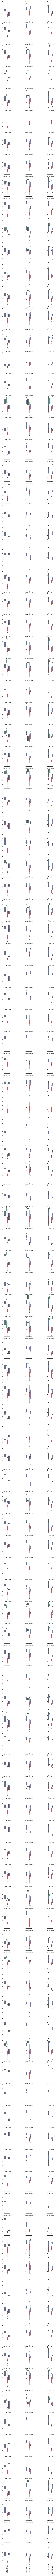

In [277]:
temp = df['district_name'].unique()
df3 = df[df.apply(lambda x: x['district_name'] in temp, axis = 1)]

sns.set_style("ticks")
sns.set_context("notebook")
plot = sns.factorplot(
    data=df3,
    x="Race", y = "Percentage", kind="box",
    row="district_name",
    col = "subject");
plot.set_xlabels("Race");
plot.set_xticklabels(rotation=90);
plot.set_ylabels("Percentages");
plot.set_titles("{col_name}");

In [278]:
plot.savefig("school_math.png", dpi=100)